<a href="https://colab.research.google.com/github/RubaEgbaria/ClassificationTechniques/blob/master/Classification_Techniques_data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Pre-process the data such as filling missing, cleaning, scaling etc., before applying the algorithms**

In [4]:
# first lets import the .csv file

import pandas as pd

data = pd.read_csv("globalterrorism.csv", encoding='latin-1', on_bad_lines='skip', engine='python')

data.shape

(181691, 135)

In [5]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [6]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)
data[:10]

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

#understanding the data and the features

In [7]:
# # just to understand the features we are dealing with...
# Identification & Timing:
# - eventid => Unique identifier for each attack
# - iyear => Year of attack
# - imonth => Month of attack (0 if unknown)
# - iday => Day of attack (0 if unknown)
# - approxdate => Approximate date (when exact date unknown)
# - extended => Duration extended beyond 24 hours (1=yes, 0=no)

# Location Data:
# - country => Country code
# - country_txt => Country name
# - region => Region code
# - region_txt => Region name
# - provstate => Province/state
# - city => City
# - latitude => Geographic latitude
# - longitude => Geographic longitude
# - specificity => Location specificity code (1=exact, 2=city, 3=state, 4=region)
# - vicinity => Near a populated place (1=yes, 0=no)
# - location => Location details text

# Attack Details:
# - summary => Narrative description
# - crit1-3 => Criteria met for terrorism definition (1=yes, 0=no)
# - doubtterr => Doubt terrorism was motive (1=yes, 0=no)
# - alternative => Alternative designation type
# - multiple => Part of multiple incidents (1=yes, 0=no)
# - success => Successful attack (1=yes, 0=no)
# - suicide => Suicide attack (1=yes, 0=no)

# Attack Types (1=primary, 2=secondary, 3=tertiary):
# - attacktype1-3 => Attack type codes
# - attacktype1_txt-3_txt => Attack type descriptions

# Target Information:
# - targtype1-3 => Target type codes
# - targtype1_txt-3_txt => Target type descriptions
# - targsubtype1-3 => Target subtype codes
# - targsubtype1_txt-3_txt => Target subtype descriptions
# - corp1-3 => Specific corporation/organization targeted
# - target1-3 => Target description
# - natlty1-3 => Nationality codes of targets
# - natlty1_txt-3_txt => Nationality descriptions

# Perpetrator Data:
# - gname => Primary group name
# - gsubname => Group subgroup
# - gname2-3 => Secondary group names
# - gsubname2-3 => Secondary subgroups
# - motive => Stated motive
# - guncertain1-3 => Group attribution certainty (1=uncertain, 0=certain)
# - individual => Perpetrated by individual (1=yes, 0=no)
# - nperps => Number of perpetrators
# - nperpcap => Number of perpetrators captured

# Claim of Responsibility:
# - claimed => Claimed by group (1=yes, 0=no)
# - claimmode => Claim method code
# - claimmode_txt => Claim method description
# - claim2-3 => Secondary claims
# - compclaim => Competing claims (1=yes, 0=no)

# Weapon Information:
# - weaptype1-4 => Weapon type codes
# - weaptype1_txt-4_txt => Weapon type descriptions
# - weapsubtype1-4 => Weapon subtype codes
# - weapsubtype1_txt-4_txt => Weapon subtype descriptions
# - weapdetail => Weapon details text

# Casualties:
# - nkill => Total fatalities
# - nkillus => US citizens killed
# - nkillter => Perpetrators killed
# - nwound => Total injured
# - nwoundus => US citizens wounded
# - nwoundte => Perpetrators wounded

# Property Damage:
# - property => Property damage occurred (1=yes, 0=no)
# - propextent => Property extent code
# - propextent_txt => Property extent description
# - propvalue => Property damage value
# - propcomment => Property damage comments

# Hostage/Kidnapping:
# - ishostkid => Hostage/kidnapping event (1=yes, 0=no)
# - nhostkid => Total hostages/kidnapped
# - nhostkidus => US hostages/kidnapped
# - nhours => Hours in captivity
# - ndays => Days in captivity
# - divert => Transportation diversion (1=yes, 0=no)
# - kidhijcountry => Hostage country
# - ransom => Ransom demanded (1=yes, 0=no)
# - ransomamt => Ransom amount
# - ransomamtus => Ransom amount (USD)
# - ransompaid => Ransom paid amount
# - ransompaidus => Ransom paid (USD)
# - ransomnote => Ransom notes
# - hostkidoutcome => Hostage outcome code
# - hostkidoutcome_txt => Hostage outcome description
# - nreleased => Number of hostages released

# References & Metadata:
# - addnotes => Additional notes
# - scite1-3 => Source citations
# - dbsource => Original database source
# - INT_LOG => International logistics involved (1=yes, 0=no, -9=unknown)
# - INT_IDEO => International ideology involved (1=yes, 0=no, -9=unknown)
# - INT_MISC => Other international aspects (1=yes, 0=no, -9=unknown)
# - INT_ANY => Any international dimension (1=yes, 0=no, -9=unknown)
# - related => Related incident IDs

In [8]:
# create cols => date, (count the weapons invloved)
# keep text only => region, country, attackType(all into one), targetType(same), targetSubtype(same), nationality(same), corp(same),  guncertain1(same), claimedMode(same), propextent_txt, hostkidoutcome_txt
# values to be dropped => resolution, approxdate, iyear, imonth, iday, latitude, longitude, targetSubtype, location, target1, all names, weapsubtype, weapdetail, nkillus, propcomment, ishostkid, nhostkidus, ransom, ransomamtus, ransompaidus, ransomnote, hostkidoutcome,
# boolean values => success, multiple, suicide, extended, individual, claimed, property,
# int values => nperps, nperpcap, compclaim, nkill, nkillter, nwound, nwoundte,	propvalue, nhostkid, nhours, ndays, ransomamt (ransomvalue), ransompaid, nreleased,

Extract new features

In [9]:
# create cols => date
# lets make sure that the year, month, day are all ints

# as date
# if the value is not an int then set as NaN
data['date'] = pd.to_datetime(data[['iyear', 'imonth', 'iday']].astype(str).agg('-'.join, axis=1), errors='coerce')
data['date'].unique()

<DatetimeArray>
['1970-07-02 00:00:00',                 'NaT', '1970-01-01 00:00:00', '1970-01-02 00:00:00', '1970-01-03 00:00:00', '1970-01-06 00:00:00', '1970-01-08 00:00:00', '1970-01-09 00:00:00', '1970-01-10 00:00:00', '1970-01-11 00:00:00',
 ...
 '2017-12-22 00:00:00', '2017-12-23 00:00:00', '2017-12-24 00:00:00', '2017-12-25 00:00:00', '2017-12-26 00:00:00', '2017-12-27 00:00:00', '2017-12-28 00:00:00', '2017-12-29 00:00:00', '2017-12-30 00:00:00', '2017-12-31 00:00:00']
Length: 16071, dtype: datetime64[ns]

In [10]:
# create cols => count the weapons invloved
data['weaponsCount'] = data[['weaptype1', 'weaptype2', 'weaptype3', 'weaptype4']].notna().sum(axis=1)
data['weaponsCount'].unique()

array([1, 2, 3, 4])

In [11]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,date,weaponsCount
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN,1970-07-02,1
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN,NaT,1
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN,NaT,1
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [12]:
# keep text only => region, country, attackType(all into one), targetType(same), nationality(same), corp(same),
#  guncertain1(same), claimedMode(same), propextent_txt, hostkidoutcome_txt

data['country'] = data['country_txt'].fillna('Unknown')
data['region'] = data['region_txt'].fillna('Unknown')

data['attackType'] = (data['attacktype1_txt'].fillna(data['attacktype2_txt']).fillna(data['attacktype3_txt'])).fillna('Unknown')

data['targetType'] = (data['targtype1_txt'].fillna(data['targtype2_txt']).fillna(data['targtype3_txt'])).fillna('Unknown')

data['nationality'] = (data['natlty1_txt'].fillna(data['natlty2_txt']).fillna(data['natlty3_txt'])).fillna('Unknown')

data['corp'] = (data['corp1'].fillna(data['corp2']).fillna(data['corp3'])).fillna('Unknown')

data['gunCertain'] = (data['guncertain1'].fillna(data['guncertain2']).fillna(data['guncertain3'])).fillna('Unknown')

data['claimedMode'] = (data['claimmode_txt'].fillna(data['claimmode2_txt']).fillna(data['claimmode3_txt'])).fillna('Unknown')

data['propextent'] = data['propextent_txt'].fillna('Unknown')

data['hostkidoutcome'] = data['hostkidoutcome_txt']

data['crit'] = (data['crit1'].fillna(data['crit2']).fillna(data['crit3'])).astype(bool).fillna('Unknown')

data['weaponType'] = (data['weaptype1_txt'].fillna(data['weaptype2_txt']).fillna(data['weaptype3_txt']).fillna(data['weaptype4_txt'])).fillna('Unknown')

In [13]:
# provstate fill na to unknown
data['provstate'] = data['provstate'].fillna('Unknown')

In [14]:
# boolean values => success, multiple, suicide, extended, individual, claimed, property,
# INT_LOG	INT_IDEO	INT_MISC	INT_ANY	vicinity doubtterr

data['success'] = data['success'].astype(bool).fillna('Unknown')
data['multiple'] = data['multiple'].astype(bool).fillna('Unknown')
data['suicide'] = data['suicide'].astype(bool).fillna('Unknown')
data['extended'] = data['extended'].astype(bool).fillna('Unknown')
data['individual'] = data['individual'].astype(bool).fillna('Unknown')
data['claimed'] = data['claimed'].astype(bool).fillna('Unknown')
data['property'] = data['property'].astype(bool).fillna('Unknown')
data['INT_LOG'] = data['INT_LOG'].astype(bool).fillna('Unknown')
data['INT_IDEO'] = data['INT_IDEO'].astype(bool).fillna('Unknown')
data['INT_MISC'] = data['INT_MISC'].astype(bool).fillna('Unknown')
data['INT_ANY'] = data['INT_ANY'].astype(bool).fillna('Unknown')
data['vicinity'] = data['vicinity'].astype(bool).fillna('Unknown')
data['doubtterr'] = data['doubtterr'].astype(bool).fillna('Unknown')

In [15]:
# int values => nperps, nperpcap, compclaim, nkill, nkillter, nwound, nwoundte,
# propvalue, nhostkid, nhours, ndays, ransomamt (ransomvalue), ransompaid, nreleased,

data['nperps'] = data['nperps'].fillna(0).astype(int)
data['nperpcap'] = data['nperpcap'].fillna(0).astype(int)
data['compclaim'] = data['compclaim'].fillna(0).astype(int)
data['nkill'] = data['nkill'].fillna(0).astype(int)
data['nkillter'] = data['nkillter'].fillna(0).astype(int)
data['nwound'] = data['nwound'].fillna(0).astype(int)
data['nwoundte'] = data['nwoundte'].fillna(0).astype(int)
data['propvalue'] = data['propvalue'].fillna(data['propvalue'].mean()).astype(int)
data['nhostkid'] = data['nhostkid'].fillna(0).astype(int)
data['nhours'] = data['nhours'].fillna(0).astype(int)
data['ndays'] = data['ndays'].fillna(0).astype(int)
data['ransomamt'] = data['ransomamt'].fillna(data['ransomamt'].mean()).astype(int)
data['ransompaid'] = data['ransompaid'].fillna(0).astype(int)
data['nreleased'] = data['nreleased'].fillna(0).astype(int)

# change the col name
data = data.rename(columns={'nperps': 'perpsCount', 'nperpcap': 'perpsCapCount', 'compclaim': 'compClaim',
                            'nkill': 'killCount', 'nkillter': 'killTerCount', 'nwound': 'woundCount',
                            'nwoundte': 'woundTeCount', 'propvalue': 'propValue,', 'nhostkid': 'hostkidCount',
                            'nhours': 'hoursCount', 'ndays': 'daysCount', 'ransomamt': 'ransomValue',
                            'ransompaid': 'ransomPaid', 'nreleased': 'releasedCount'})

data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,perpsCount,perpsCapCount,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compClaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,killCount,nkillus,killTerCount,woundCount,nwoundus,woundTeCount,property,propextent,propextent_txt,"propValue,",propcomment,ishostkid,hostkidCount,nhostkidus,hoursCount,daysCount,divert,kidhijcountry,ransom,ransomValue,ransomamtus,ransomPaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,releasedCount,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,date,weaponsCount,attackType,targetType,nationality,corp,gunCertain,claimedMode,crit,weaponType
0,197000000001,1970,7,2,NaN,False,NaN,Dominican Republic,Dominican Republic,Central America & Caribbean,Central America & Caribbean,Unknown,Santo Domingo,18.456792,-69.951164,1.0,False,NaN,NaN,1,1,1,False,NaN,NaN,False,True,False,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,False,0,0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,0,0,NaN,0,False,Unknown,NaN,208811,NaN,0.0,0,NaN,0,0,NaN,NaN,0.0,3172529,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,PGIS,False,False,False,False,NaN,1970-07-02,1,Assassination,Private Citizens & Property,Dominican Republic,Unknown,0.0,Unknown,True,Unknown
1,197000000002,1970,0,0,NaN,False,NaN,Mexico,Mexico,North America,North America,Federal,Mexico city,19.371887,-99.086624,1.0,False,NaN,NaN,1,1,1,False,NaN,NaN,False,True,False,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,False,7,0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,0,NaN,0,False,Unknown,NaN,208811,NaN,1.0,1,0.0,0,0,NaN,Mexico,1.0,800000,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,PGIS,False,True,True,True,NaN,NaT,1,Hostage Taking (Kidnapping),Government (Diplomatic),Belgium,Belgian Ambassador Daughter,0.0,Unknown,True,Unknown
2,197001000001,1970,1,0,NaN,False,NaN,Philippines,Philippines,Southeast Asia,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,False,NaN,NaN,1,1,1,False,NaN,NaN,False,True,False,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,False,0,0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,0,0,NaN,0,False,Unknown,NaN,208811,NaN,0.0,0,NaN,0,0,NaN,NaN,0.0,3172529,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,PGIS,True,True,True,True,NaN,NaT,1,Assassina

In [16]:
# values to be dropped => resolution, approxdate, iyear, imonth, iday, latitude, longitude, targetSubtype, location, target1, all names, weapsubtype, weapdetail, nkillus, propcomment, ishostkid, nhostkidus, ransom, ransomamtus, ransompaidus, ransomnote, hostkidoutcome,

# resolution is mostly NaN
# approxdate, iyear, imonth, iday were converted to date
# location are too much details since we have the city, provstate, region and country
# we will drop 'latitude', 'longitude' latter since we need it to fill the missing city and provstate
data = data.drop(['iyear', 'imonth', 'iday', 'location'], axis=1)

# we have merged some, and dropped the ones that has multiple definations.

data = data.drop(['country_txt', 'region_txt', 'attacktype1_txt', 'attacktype2_txt', 'attacktype3_txt', 'targtype1_txt',  # transformed
                  'targtype2_txt', 'targtype3_txt', 'natlty1_txt', 'natlty2_txt', 'natlty3_txt', 'corp1', 'corp2', 'corp3', # transformed
                  'guncertain1', 'guncertain2', 'guncertain3', 'claimmode_txt', 'claimmode2_txt', 'claimmode', # transformed
                  'claimmode3_txt', 'propextent_txt', 'hostkidoutcome_txt', 'natlty1', 'natlty2', 'natlty3',   # transformed
                  'targsubtype1', 'targsubtype2', 'targsubtype3', # those has so many categories we can stick to target type
                  'weaptype1', 'weaptype2', 'weaptype3', 'weaptype4', # transformed to weaponType
                  'weapsubtype1', 'weapsubtype2', 'weapsubtype3',  # those has so many categories we can stick to weapon type
                  'weapsubtype4', 'weaptype1_txt', 'weaptype2_txt', 'weaptype3_txt', 'weaptype4_txt', 'weapsubtype1_txt',
                  'weapsubtype2_txt', 'weapsubtype3_txt', 'weapsubtype4_txt'
                  ], axis=1)

# drop unneeded info (names)
data = data.drop(['gname', 'gname2', 'gname3','gsubname', 'gsubname2', 'gsubname3', 'target1', 'target2', 'target3'], axis=1)

# those data are transformed to another column
data = data.drop(['summary', 'attacktype1', 'attacktype2', 'attacktype3', 'targtype1', 'targsubtype1_txt', 'targtype2',
                  'targsubtype2_txt', 'targtype3', 'targsubtype3_txt', 'corp', 'propextent', 'propcomment',
                  'ishostkid', 'nhostkidus', 'ransom', 'ransomamtus',
                  'ransompaidus', 'ransomnote', 'hostkidoutcome', 'addnotes', 'scite1', 'scite2', 'scite3', 'crit1', 'crit2', 'crit3'], axis=1)

data = data.drop(['claim2', 'claimmode2', 'claim3', 'claimmode3', 'weapdetail', 'nkillus', 'nwoundus', 'alternative_txt'], axis=1)

data.head()

,eventid,approxdate,extended,resolution,country,region,provstate,city,latitude,longitude,specificity,vicinity,doubtterr,alternative,multiple,success,suicide,motive,individual,perpsCount,perpsCapCount,claimed,compClaim,killCount,killTerCount,woundCount,woundTeCount,property,"propValue,",hostkidCount,hoursCount,daysCount,divert,kidhijcountry,ransomValue,ransomPaid,releasedCount,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,date,weaponsCount,attackType,targetType,nationality,gunCertain,claimedMode,crit,weaponType
0,197000000001,NaN,False,NaN,Dominican Republic,Central America & Caribbean,Unknown,Santo Domingo,18.456792,-69.951164,1.0,False,False,NaN,False,True,False,NaN,False,0,0,True,0,1,0,0,0,False,208811,0,0,0,NaN,NaN,3172529,0,0,PGIS,False,False,False,False,NaN,1970-07-02,1,Assassination,Private Citizens & Property,Dominican Republic,0.0,Unknown,True,Unknown
1,197000000002,NaN,False,NaN,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,1.0,False,False,NaN,False,True,False,NaN,False,7,0,True,0,0,0,0,0,False,208811,1,0,0,NaN,Mexico,800000,0,0,PGIS,False,True,True,True,NaN,NaT,1,Hostage Taking (Kidnapping),Government (Diplomatic),Belgium,0.0,Unknown,True,Unknown
2,197001000001,NaN,False,NaN,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,False,False,NaN,False,True,False,NaN,False,0,0,True,0,1,0,0,0,False,208811,0,0,0,NaN,NaN,3172529,0,0,PGIS,True,True,True,True,NaN,NaT,1,Assassination,Journalists & Media,United States,0.0,Unknown,True,Unknown
3,197001000002,NaN,False,NaN,Greece,Western Europe,Attica,Athens,37.997490,23.762728,1.0,False,False,NaN,False,True,False,NaN,False,0,0,True,0,0,0,0,0,True,208811,0,0,0,NaN,NaN,3172529,0,0,PGIS,True,True,True,True,NaN,NaT,1,Bombing/Explosion,Government (Diplomatic),United States,0.0,Unknown,True,Explosives
4,197001000003,NaN,False,NaN,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,False,True,NaN,False,True,False,NaN,False,0,0,True,0,0,0,0,0,True,208811,0,0,0,NaN,NaN,3172529,0,0,PGIS,True,True,True,True,NaN,NaT,1,Facility/Infrastructure Attack,Government (Diplomatic),United States,0.0,Unknown,True,Incendiary


In [17]:
data.isna().sum().to_frame().T

,eventid,approxdate,extended,resolution,country,region,provstate,city,latitude,longitude,specificity,vicinity,doubtterr,alternative,multiple,success,suicide,motive,individual,perpsCount,perpsCapCount,claimed,compClaim,killCount,killTerCount,woundCount,woundTeCount,property,"propValue,",hostkidCount,hoursCount,daysCount,divert,kidhijcountry,ransomValue,ransomPaid,releasedCount,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,date,weaponsCount,attackType,targetType,nationality,gunCertain,claimedMode,crit,weaponType
0,0,172452,0,179471,0,0,0,435,4556,4557,6,0,0,152680,0,0,0,131130,0,0,0,0,0,0,0,0,0,0,0,0,0,0,181367,178386,0,0,0,0,0,0,0,0,156653,891,0,0,0,0,0,0,0,0


In [18]:
data.shape

(181691, 52)

In [19]:
# calculate null % so we can drop the ones that has very high null %

nullPct = (data.isna().mean()).sort_values(ascending=False)
print(nullPct[nullPct > 0])

divert           0.998217
resolution       0.987781
kidhijcountry    0.981810
approxdate       0.949150
related          0.862195
alternative      0.840328
motive           0.721720
longitude        0.025081
latitude         0.025076
date             0.004904
city             0.002394
specificity      0.000033
dtype: float64


In [20]:
# dropping the features with very high null rate, so we have a clean dataset
# divert        =>   0.998217
# resolution    =>   0.987781
# kidhijcountry =>   0.981810
# approxdate    =>   0.949150

data = data.drop(['divert','resolution', 'approxdate'], axis=1)
data.shape

(181691, 49)

In [21]:
data.describe()

,eventid,latitude,longitude,specificity,alternative,perpsCount,perpsCapCount,compClaim,killCount,killTerCount,woundCount,woundTeCount,"propValue,",hostkidCount,hoursCount,daysCount,ransomValue,ransomPaid,releasedCount,date,weaponsCount
count,1.816910e+05,177135.000000,1.771340e+05,181685.000000,29011.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,1.816910e+05,181691.000000,181691.000000,181691.000000,1.816910e+05,1.816910e+05,181691.000000,180800,181691.000000
mean,2.002705e+11,23.498343,-4.586957e+02,1.451452,1.292923,-39.778387,-0.937267,-0.167691,2.266860,0.320825,2.883291,0.066382,2.088112e+05,0.338624,-1.046425,-1.453914,3.172529e+06,3.058426e+03,-1.661007,2003-03-15 05:02:19.221238912,1.082904
min,1.970000e+11,-53.154613,-8.618590e+07,1.000000,1.000000,-99.000000,-99.000000,-9.000000,0.000000,0.000000,0.000000,0.000000,-9.900000e+01,-99.000000,-99.000000,-99.000000,-9.900000e+01,-9.900000e+01,-99.000000,1970-01-01 00:00:00,1.000000
25%,1.991021e+11,11.510046,4.545640e+00,1.000000,1.000000,-99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.088110e+05,0.000000,0.000000,0.000000,3.172529e+06,0.000000e+00,0.000000,1991-03-10 00:00:00,1.000000
50%,2.009022e+11,31.467463,4.324651e+01,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.088110e+05,0.000000,0.000000,0.000000,3.172529e+06,0.000000e+00,0.000000,2009-03-25 00:00:00,1.000000
75%,2.014081e+11,34.685087,6.871033e+01,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,2.088110e+05,0.000000,0.000000,0.000000,3.172529e+06,0.000000e+00,0.000000,2014-08-14 00:00:00,1.000000
max,2.017123e+11,74.633553,1.793667e+02,5.000000,5.000000,25000.000000,406.000000,1.000000,1570.000000,500.000000,8191.000000,200.000000,2.700000e+09,17000.000000,999.000000,2454.000000,1.000000e+09,2.750000e+08,2769.000000,2017-12-31 00:00:00,4.000000
std,1.325957e+09,18.569242,2.047790e+05,0.995430,0.703729,171.910898,10.109512,1.226873,11.227057,3.346474,34.309746,1.172976,7.191529e+06,55.306010,14.182627,26.495243,2.603237e+06,6.633028e+05,17.106895,NaN,0.313266


In [22]:
# Fill city using provstate + country
mask = data['city'].isna() & data['provstate'].notna()
data.loc[mask, 'city'] = data.loc[mask, 'provstate'] + ' City'

# Fill coordinates using known city data
cityCoords = data.dropna(subset=['latitude', 'longitude', 'city']).groupby('city')[['latitude', 'longitude']].first()
for city, coords in cityCoords.iterrows():
    mask = (data['city'] == city) & (data['latitude'].isna())
    data.loc[mask, ['latitude', 'longitude']] = coords.values

data.isna().sum().to_frame().T

,eventid,extended,country,region,provstate,city,latitude,longitude,specificity,vicinity,doubtterr,alternative,multiple,success,suicide,motive,individual,perpsCount,perpsCapCount,claimed,compClaim,killCount,killTerCount,woundCount,woundTeCount,property,"propValue,",hostkidCount,hoursCount,daysCount,kidhijcountry,ransomValue,ransomPaid,releasedCount,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,date,weaponsCount,attackType,targetType,nationality,gunCertain,claimedMode,crit,weaponType
0,0,0,0,0,0,0,1846,1847,6,0,0,152680,0,0,0,131130,0,0,0,0,0,0,0,0,0,0,0,0,0,0,178386,0,0,0,0,0,0,0,0,156653,891,0,0,0,0,0,0,0,0


In [23]:
# drop latitude and longitude, not needed we have other valueable features than them
data = data.drop(['latitude', 'longitude'], axis=1)

In [24]:
data.head()

,eventid,extended,country,region,provstate,city,specificity,vicinity,doubtterr,alternative,multiple,success,suicide,motive,individual,perpsCount,perpsCapCount,claimed,compClaim,killCount,killTerCount,woundCount,woundTeCount,property,"propValue,",hostkidCount,hoursCount,daysCount,kidhijcountry,ransomValue,ransomPaid,releasedCount,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,date,weaponsCount,attackType,targetType,nationality,gunCertain,claimedMode,crit,weaponType
0,197000000001,False,Dominican Republic,Central America & Caribbean,Unknown,Santo Domingo,1.0,False,False,NaN,False,True,False,NaN,False,0,0,True,0,1,0,0,0,False,208811,0,0,0,NaN,3172529,0,0,PGIS,False,False,False,False,NaN,1970-07-02,1,Assassination,Private Citizens & Property,Dominican Republic,0.0,Unknown,True,Unknown
1,197000000002,False,Mexico,North America,Federal,Mexico city,1.0,False,False,NaN,False,True,False,NaN,False,7,0,True,0,0,0,0,0,False,208811,1,0,0,Mexico,800000,0,0,PGIS,False,True,True,True,NaN,NaT,1,Hostage Taking (Kidnapping),Government (Diplomatic),Belgium,0.0,Unknown,True,Unknown
2,197001000001,False,Philippines,Southeast Asia,Tarlac,Unknown,4.0,False,False,NaN,False,True,False,NaN,False,0,0,True,0,1,0,0,0,False,208811,0,0,0,NaN,3172529,0,0,PGIS,True,True,True,True,NaN,NaT,1,Assassination,Journalists & Media,United States,0.0,Unknown,True,Unknown
3,197001000002,False,Greece,Western Europe,Attica,Athens,1.0,False,False,NaN,False,True,False,NaN,False,0,0,True,0,0,0,0,0,True,208811,0,0,0,NaN,3172529,0,0,PGIS,True,True,True,True,NaN,NaT,1,Bombing/Explosion,Government (Diplomatic),United States,0.0,Unknown,True,Explosives
4,197001000003,False,Japan,East Asia,Fukouka,Fukouka,1.0,False,True,NaN,False,True,False,NaN,False,0,0,True,0,0,0,0,0,True,208811,0,0,0,NaN,3172529,0,0,PGIS,True,True,True,True,NaN,NaT,1,Facility/Infrastructure Attack,Government (Diplomatic),United States,0.0,Unknown,True,Incendiary


In [25]:
# remove outliers from numiric data using Interquartile Range (IQR)
# specificity, perpsCount	perpsCapCount, compClaim	killCount	killTerCount	woundCount,
	# woundTeCount, hostkidCount	hoursCount	daysCount releasedCount weaponsCount ransom

numerical_cols = ['killCount', 'woundCount']

Q1 = data[numerical_cols].quantile(0.25)
Q3 = data[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 2 * IQR
upper_bound = Q3 + 2 * IQR

lower_bound = lower_bound.clip(lower=0)

print("Lower Bound:")
print(lower_bound)
print("\nUpper Bound:")
print(upper_bound)

print("filteredData")
outlier_mask = (
      (data[numerical_cols] < lower_bound) |
      (data[numerical_cols] > upper_bound)
).any(axis=1)

filteredData = data[~outlier_mask]
print(filteredData.shape)

print("Original Data")
print(data.shape)

print(f"Removed {len(data) - len(filteredData)} outliers.")

data = filteredData.copy()

Lower Bound:
killCount     0.0
woundCount    0.0
dtype: float64

Upper Bound:
killCount     6.0
woundCount    6.0
dtype: float64
filteredData
(156328, 47)
Original Data
(181691, 47)
Removed 25363 outliers.


In [26]:
# to bool compClaim
data['compClaim'] = data['compClaim'].astype(bool)

In [27]:
data.describe()

,eventid,specificity,alternative,perpsCount,perpsCapCount,killCount,killTerCount,woundCount,woundTeCount,"propValue,",hostkidCount,hoursCount,daysCount,ransomValue,ransomPaid,releasedCount,date,weaponsCount
count,1.563280e+05,156324.000000,24077.000000,156328.000000,156328.000000,156328.000000,156328.000000,156328.000000,156328.000000,1.563280e+05,156328.000000,156328.000000,156328.000000,1.563280e+05,1.563280e+05,156328.000000,155511,156328.000000
mean,2.002325e+11,1.451332,1.305644,-40.629235,-1.021225,0.745266,0.089306,0.687957,0.019491,1.829234e+05,0.188386,-1.040754,-1.485588,3.172804e+06,3.539454e+03,-1.812542,2002-10-28 09:44:54.808727296,1.070160
min,1.970000e+11,1.000000,1.000000,-99.000000,-99.000000,0.000000,0.000000,0.000000,0.000000,-9.900000e+01,-99.000000,-99.000000,-99.000000,-9.900000e+01,-9.900000e+01,-99.000000,1970-01-01 00:00:00,1.000000
25%,1.990063e+11,1.000000,1.000000,-99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.088110e+05,0.000000,0.000000,0.000000,3.172529e+06,0.000000e+00,0.000000,1990-07-28 00:00:00,1.000000
50%,2.008123e+11,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.088110e+05,0.000000,0.000000,0.000000,3.172529e+06,0.000000e+00,0.000000,2009-01-20 00:00:00,1.000000
75%,2.014072e+11,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.088110e+05,0.000000,0.000000,0.000000,3.172529e+06,0.000000e+00,0.000000,2014-07-25 00:00:00,1.000000
max,2.017123e+11,5.000000,5.000000,10000.000000,271.000000,6.000000,70.000000,6.000000,16.000000,5.480000e+08,17000.000000,999.000000,2454.000000,1.000000e+09,2.750000e+08,1201.000000,2017-12-31 00:00:00,4.000000
std,1.349083e+09,0.994868,0.702444,163.558289,10.375935,1.249476,0.565853,1.377945,0.236201,1.534176e+06,55.280555,14.707760,27.829713,2.805785e+06,7.150635e+05,15.625007,NaN,0.284717


In [28]:
# normalize ransomValue	ransomPaid
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[['ransomValue', 'ransomPaid']] = scaler.fit_transform(data[['ransomValue', 'ransomPaid']])

# normalize all the numiric data
# specificity, perpsCount	perpsCapCount, compClaim	killCount	killTerCount	woundCount,
	# woundTeCount, hostkidCount	hoursCount	daysCount releasedCount weaponsCount

data[['specificity', 'perpsCount', 'perpsCapCount', 'compClaim', 'killCount', 'killTerCount', 'woundCount',
      'woundTeCount', 'hostkidCount', 'hoursCount', 'daysCount', 'releasedCount', 'weaponsCount']] = scaler.fit_transform(data
    [['specificity', 'perpsCount', 'perpsCapCount', 'compClaim', 'killCount', 'killTerCount', 'woundCount',
      'woundTeCount', 'hostkidCount', 'hoursCount', 'daysCount', 'releasedCount', 'weaponsCount']])


In [29]:
data.describe()

,eventid,specificity,alternative,perpsCount,perpsCapCount,compClaim,killCount,killTerCount,woundCount,woundTeCount,"propValue,",hostkidCount,hoursCount,daysCount,ransomValue,ransomPaid,releasedCount,date,weaponsCount
count,1.563280e+05,156324.000000,24077.000000,156328.000000,156328.000000,156328.000000,156328.000000,156328.000000,156328.000000,156328.000000,1.563280e+05,156328.000000,156328.000000,156328.000000,156328.000000,1.563280e+05,156328.000000,155511,156328.000000
mean,2.002325e+11,0.112833,1.305644,0.005780,0.264808,0.018384,0.124211,0.001276,0.114660,0.001218,1.829234e+05,0.005801,0.089216,0.038196,0.003173,1.323074e-05,0.074760,2002-10-28 09:44:54.808727296,0.023387
min,1.970000e+11,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.900000e+01,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1970-01-01 00:00:00,0.000000
25%,1.990063e+11,0.000000,1.000000,0.000000,0.267568,0.000000,0.000000,0.000000,0.000000,0.000000,2.088110e+05,0.005790,0.090164,0.038778,0.003173,3.599999e-07,0.076154,1990-07-28 00:00:00,0.000000
50%,2.008123e+11,0.000000,1.000000,0.009803,0.267568,0.000000,0.000000,0.000000,0.000000,0.000000,2.088110e+05,0.005790,0.090164,0.038778,0.003173,3.599999e-07,0.076154,2009-01-20 00:00:00,0.000000
75%,2.014072e+11,0.000000,1.000000,0.009803,0.267568,0.000000,0.166667,0.000000,0.166667,0.000000,2.088110e+05,0.005790,0.090164,0.038778,0.003173,3.599999e-07,0.076154,2014-07-25 00:00:00,0.000000
max,2.017123e+11,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.480000e+08,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,2017-12-31 00:00:00,1.000000
std,1.349083e+09,0.248717,0.702444,0.016195,0.028043,0.134337,0.208246,0.008084,0.229658,0.014763,1.534176e+06,0.003233,0.013395,0.010901,0.002806,2.600230e-03,0.012019,NaN,0.094906


In [30]:
# download the dataset so we start in a new clean page for part1 and part2

data.to_csv('processedGlobalTerrorism.csv', index=False)

In [31]:
data.shape

(156328, 47)

# Insights about the data

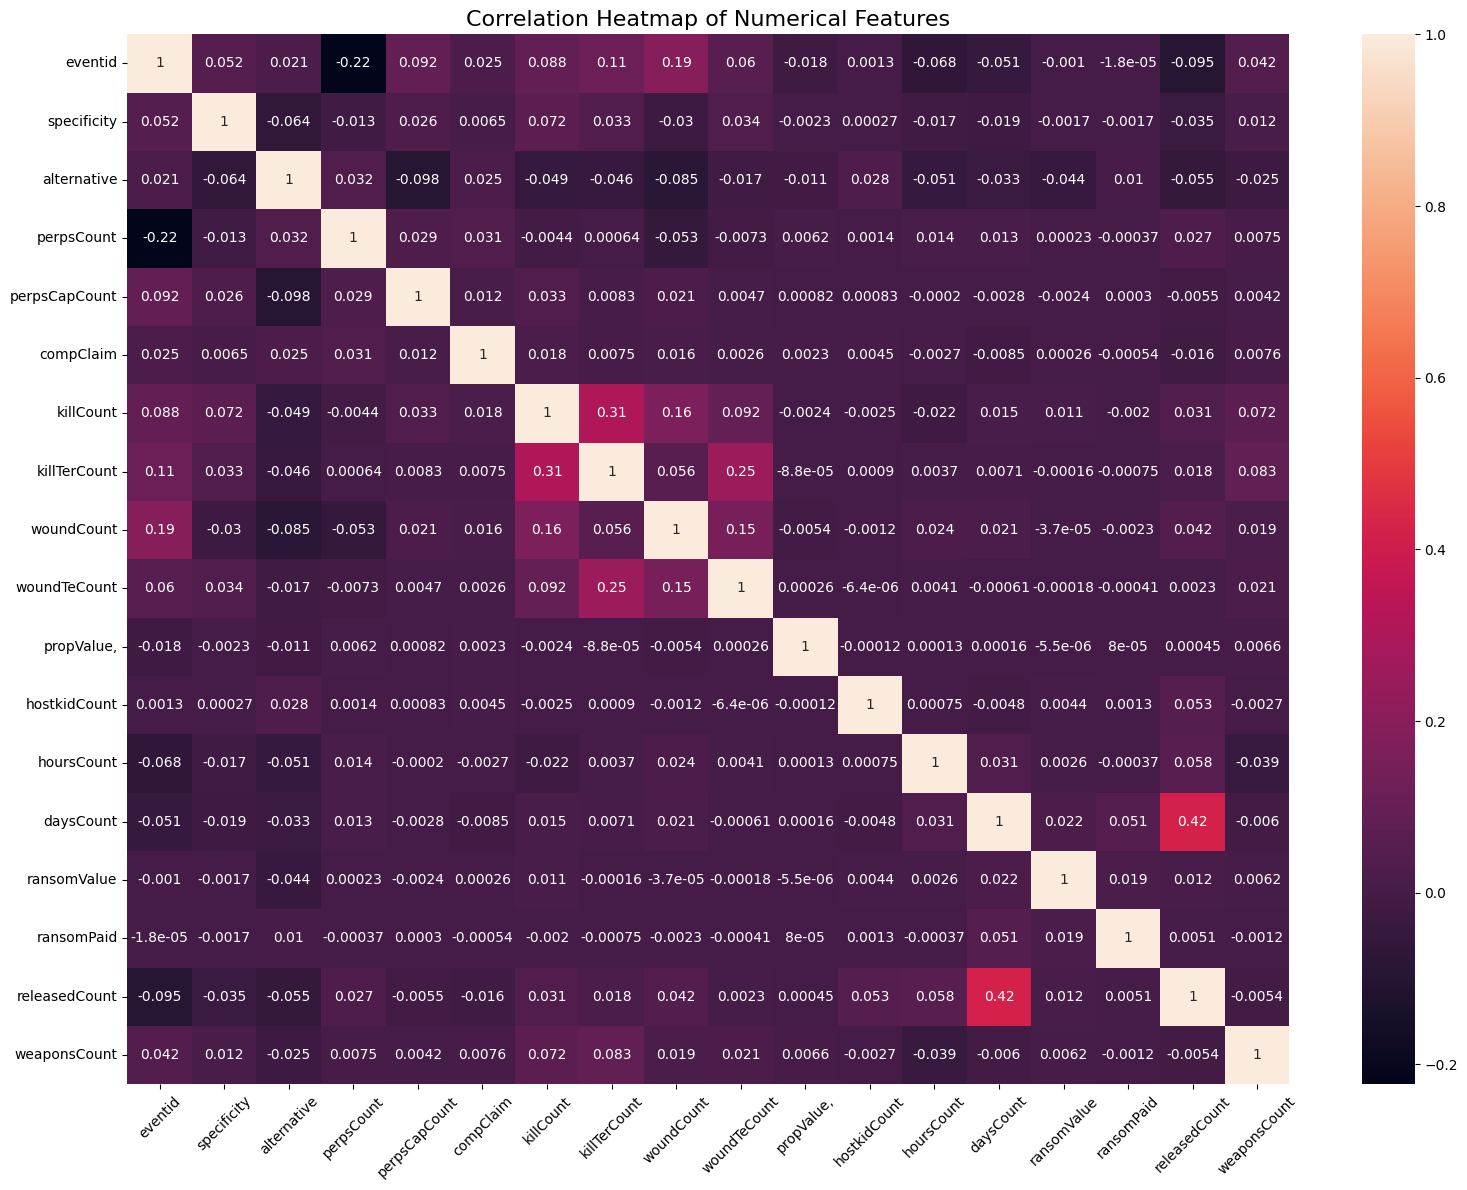

In [32]:
# heatmap the data
import matplotlib.pyplot as plt
import seaborn as sns

numerical_data = data.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(16, 12))
sns.heatmap(
    numerical_data.corr(),
    annot=True,)
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

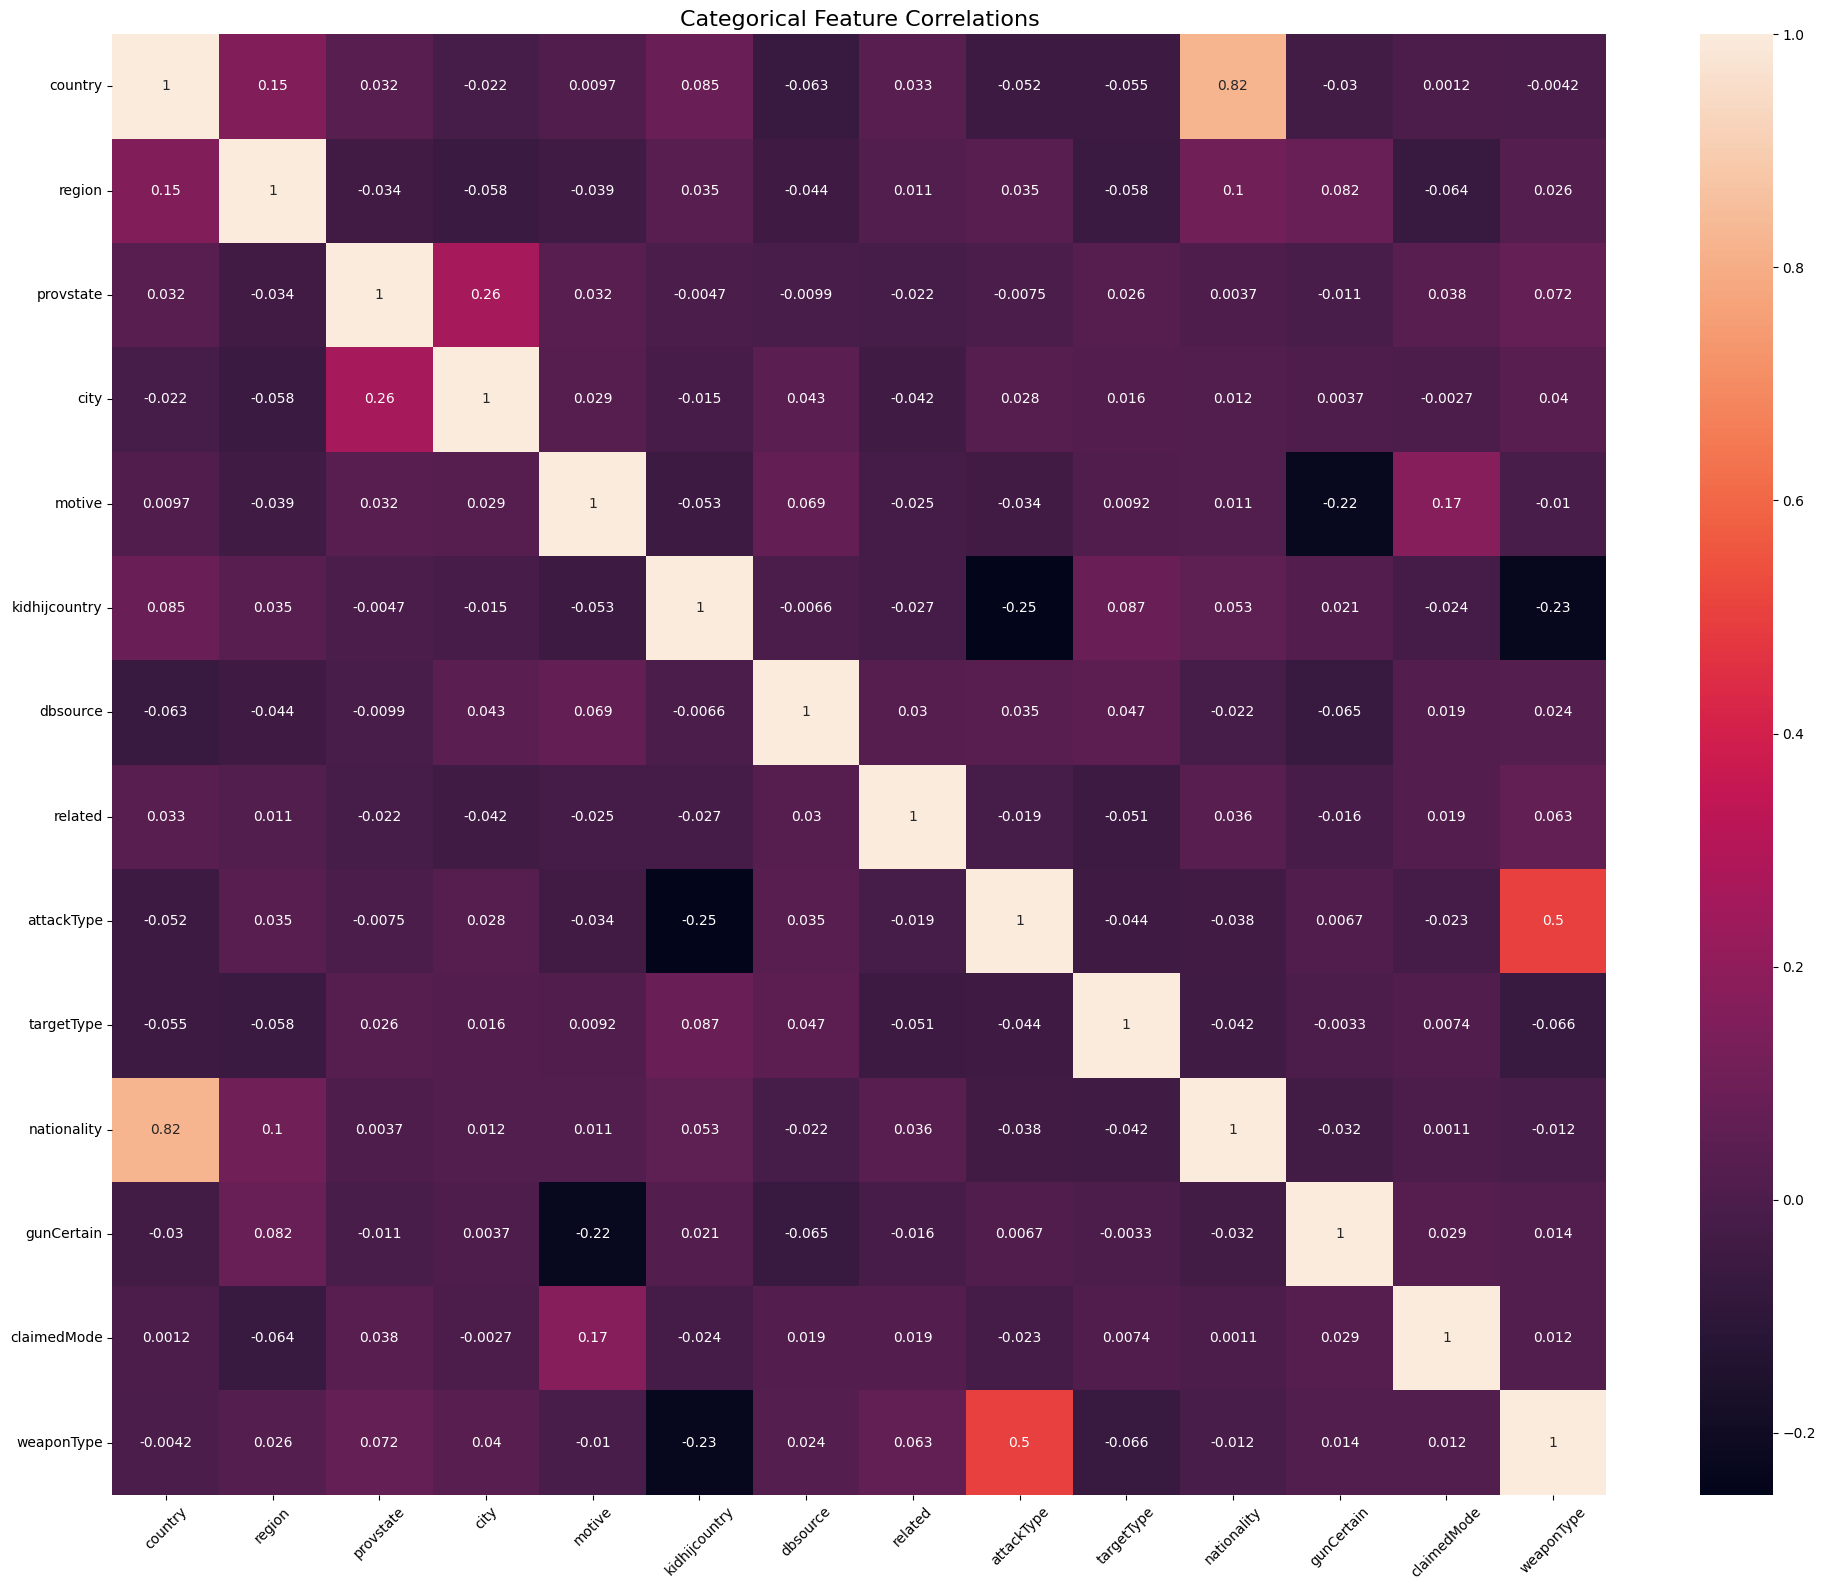

In [33]:
from sklearn.preprocessing import LabelEncoder

#  categorical columns heat map
cat_cols = [col for col in data.select_dtypes(include=['object']).columns
            if not col.endswith('_txt') and not col.endswith('_txt')]

le = LabelEncoder()

encoded_data = pd.DataFrame()
for col in cat_cols:
    encoded_data[col] = le.fit_transform(data[col].astype(str))

plt.figure(figsize=(20, 16))
sns.heatmap(
    encoded_data.corr(),
    annot=True,
)
plt.title('Categorical Feature Correlations', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

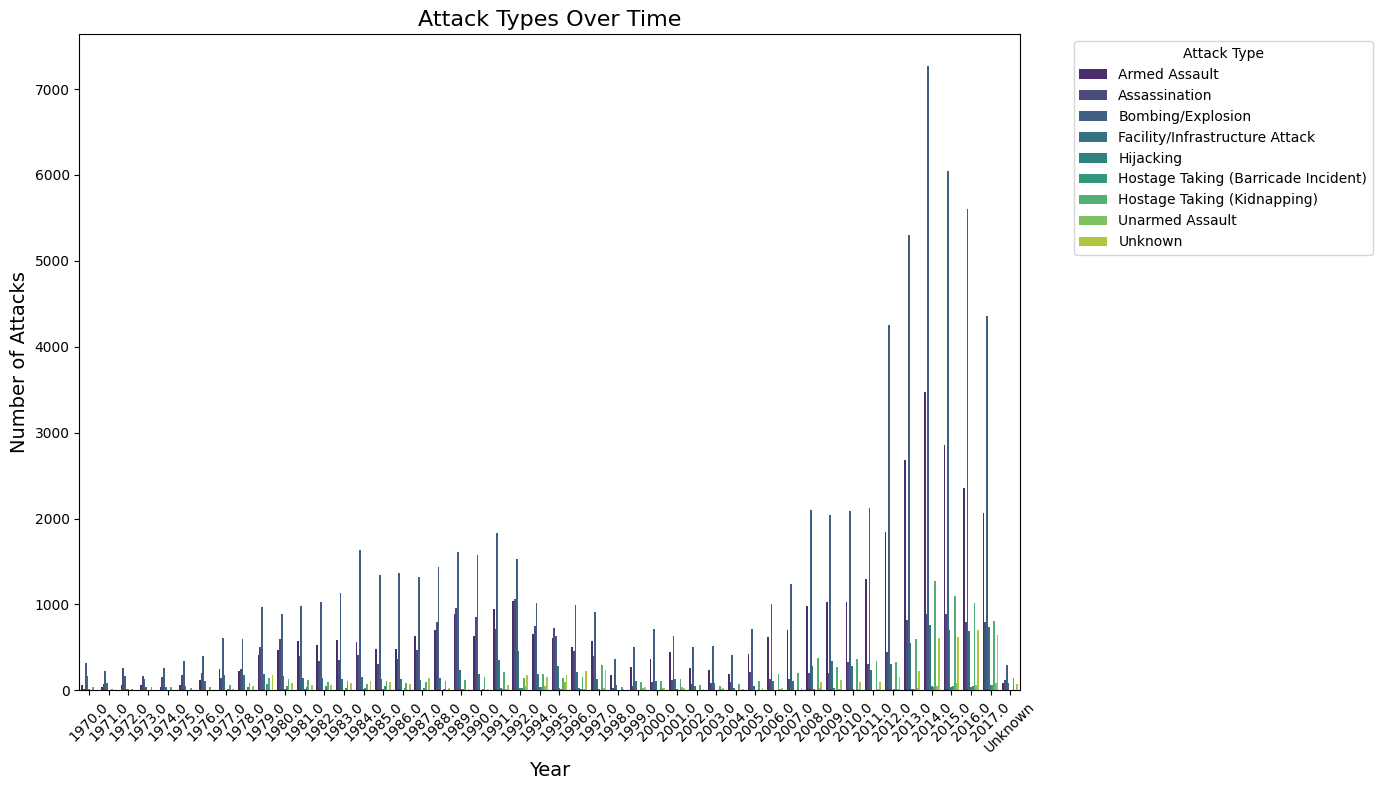

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# attacks through time

data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year.fillna('Unknown').astype(str)

topAttacks = data['attackType'].value_counts().nlargest(15).index

# Filter and group data
time_data = data[data['attackType'].isin(topAttacks)].groupby(['year', 'attackType']).size().reset_index(name='counts')

plt.figure(figsize=(14, 8))
sns.barplot(
    x='year',
    y='counts',
    hue='attackType',
    data=time_data,
    palette="viridis"
)

plt.title('Attack Types Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Attacks', fontsize=14)
plt.legend(title='Attack Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

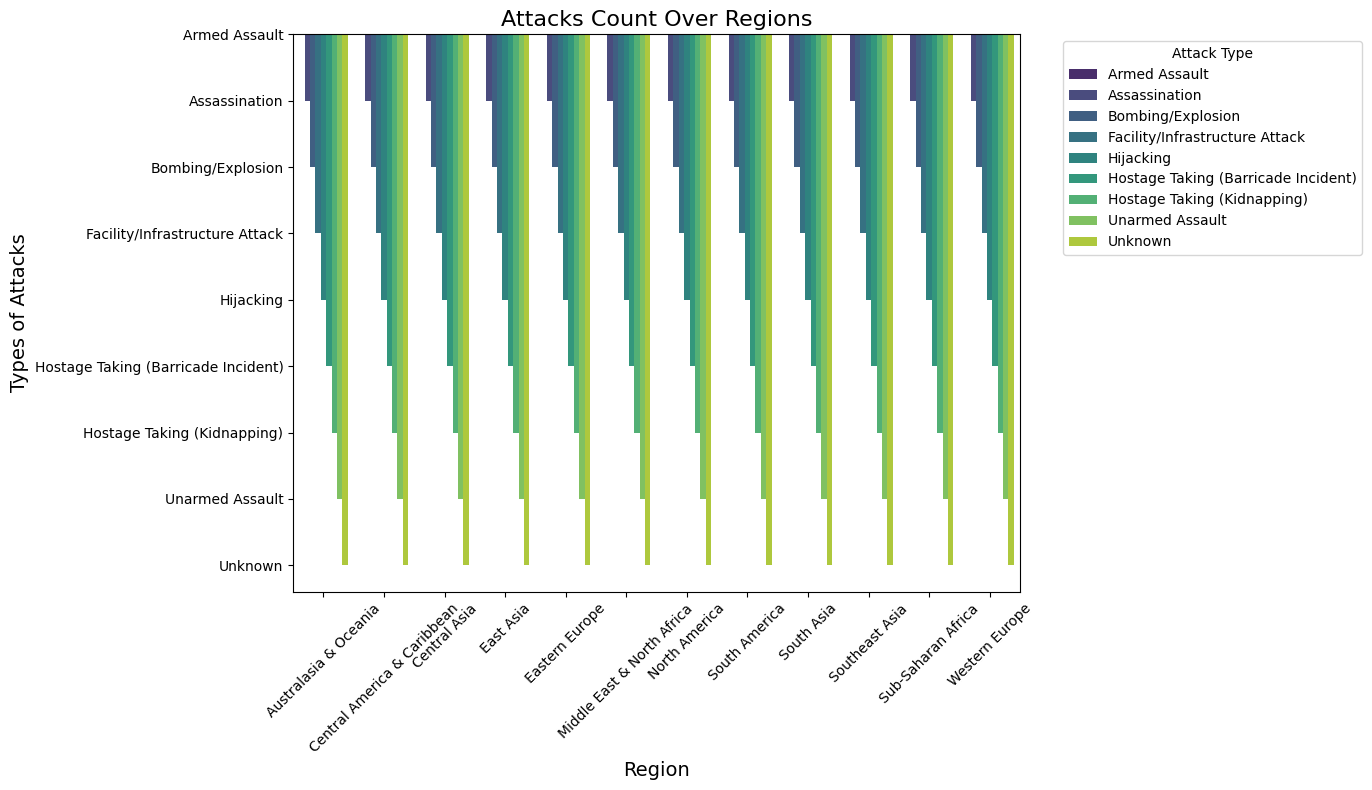

In [35]:
# attacks based on cities
topAttacks = data['attackType'].value_counts().nlargest(15).index


# Filter and group data
cityBasedData = data[data['attackType'].isin(topAttacks)].groupby(['region', 'attackType']).size().reset_index(name='counts')

plt.figure(figsize=(14, 8))
sns.barplot(
    x='region',
    y='attackType',
    hue='attackType',
    data=cityBasedData,
    palette="viridis"
)

plt.title('Attacks Count Over Regions', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Types of Attacks', fontsize=14)
plt.legend(title='Attack Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

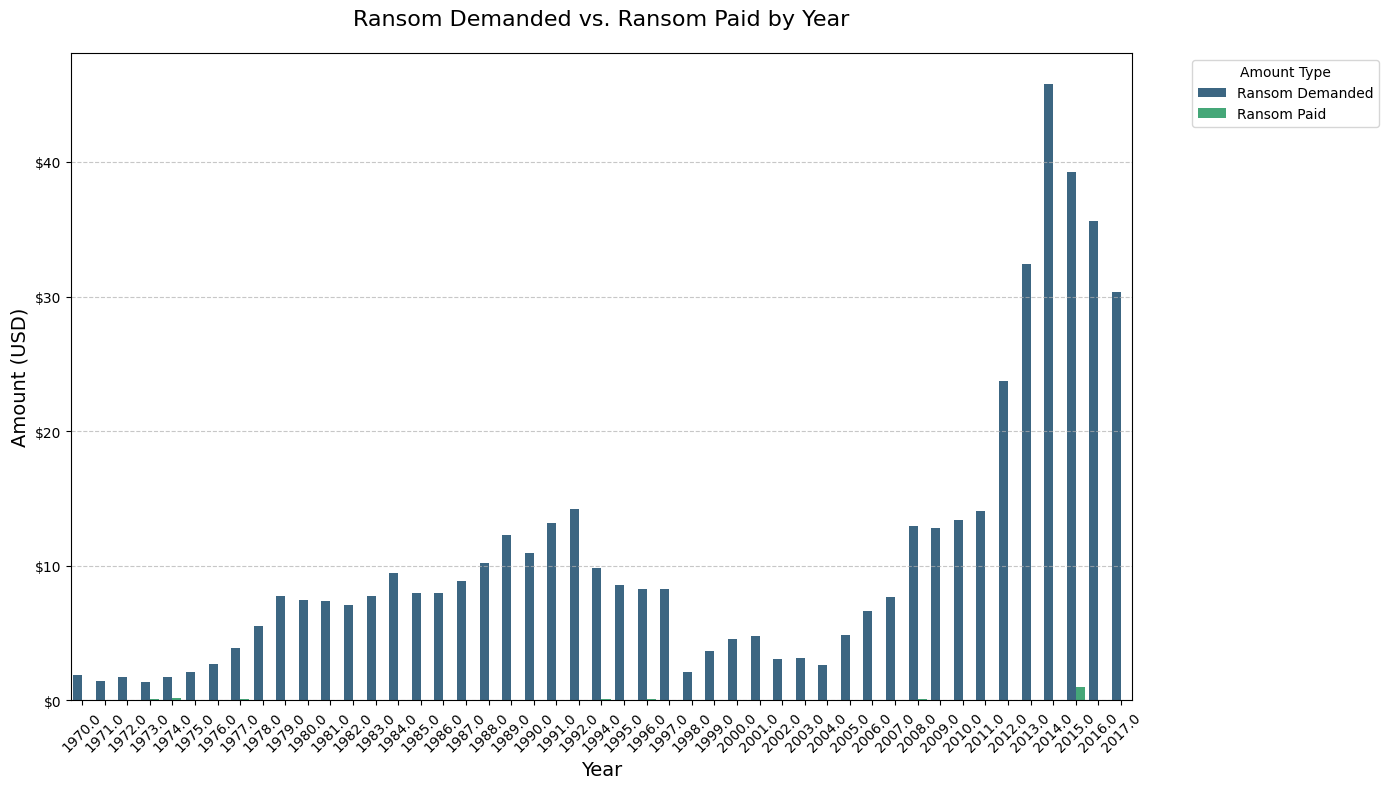

In [36]:

data['year'] = pd.to_datetime(data['date']).dt.year

ransomValSum = data.groupby('year')['ransomValue'].sum().dropna()
ransomPaidSum = data.groupby('year')['ransomPaid'].sum().dropna()

ransomFrame = pd.DataFrame({
    'Ransom Demanded': ransomValSum,
    'Ransom Paid': ransomPaidSum
}).reset_index()

ransomMelted = ransomFrame.melt(id_vars='year',
                              value_vars=['Ransom Demanded', 'Ransom Paid'],
                              var_name='Type',
                              value_name='Amount')

plt.figure(figsize=(14, 8))
ax = sns.barplot(x='year', y='Amount', hue='Type', data=ransomMelted, palette="viridis")

plt.title('Ransom Demanded vs. Ransom Paid by Year', fontsize=16, pad=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Amount (USD)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

ax.yaxis.set_major_formatter('${x:,.0f}')

plt.legend(title='Amount Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

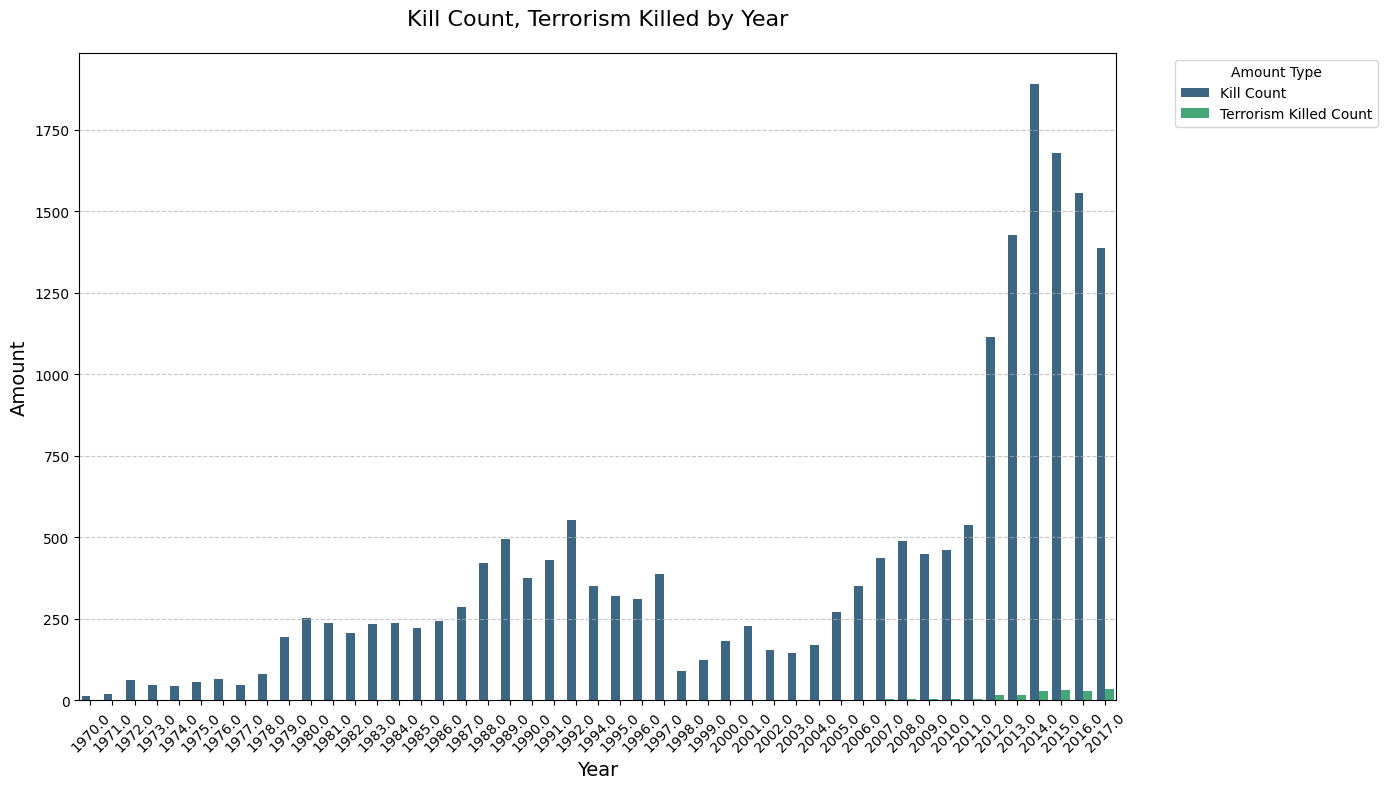

In [37]:
# killCount	killTerCount hostkidCount plot

killCountSum = data.groupby('year')['killCount'].sum().dropna()
killTerCountSum = data.groupby('year')['killTerCount'].sum().dropna()

killFrame = pd.DataFrame({
    'Kill Count': killCountSum,
    'Terrorism Killed Count': killTerCountSum
    }).reset_index()

killMelted = killFrame.melt(id_vars='year',
                              value_vars=['Kill Count', 'Terrorism Killed Count'],
                              var_name='Type',
                              value_name='Amount')

plt.figure(figsize=(14, 8))
ax = sns.barplot(x='year', y='Amount', hue='Type', data=killMelted, palette="viridis")

plt.title('Kill Count, Terrorism Killed by Year', fontsize=16, pad=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Amount', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend(title='Amount Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [38]:
# In average how long is the attack duration

hoursCount = data['hoursCount'].mean()
daysCount = data['daysCount'].mean()

print(f"Mean Hours: {hoursCount}")
print(f"Mean Days: {daysCount}")

Mean Hours: 0.08921607098763618
Mean Days: 0.038196009402869886


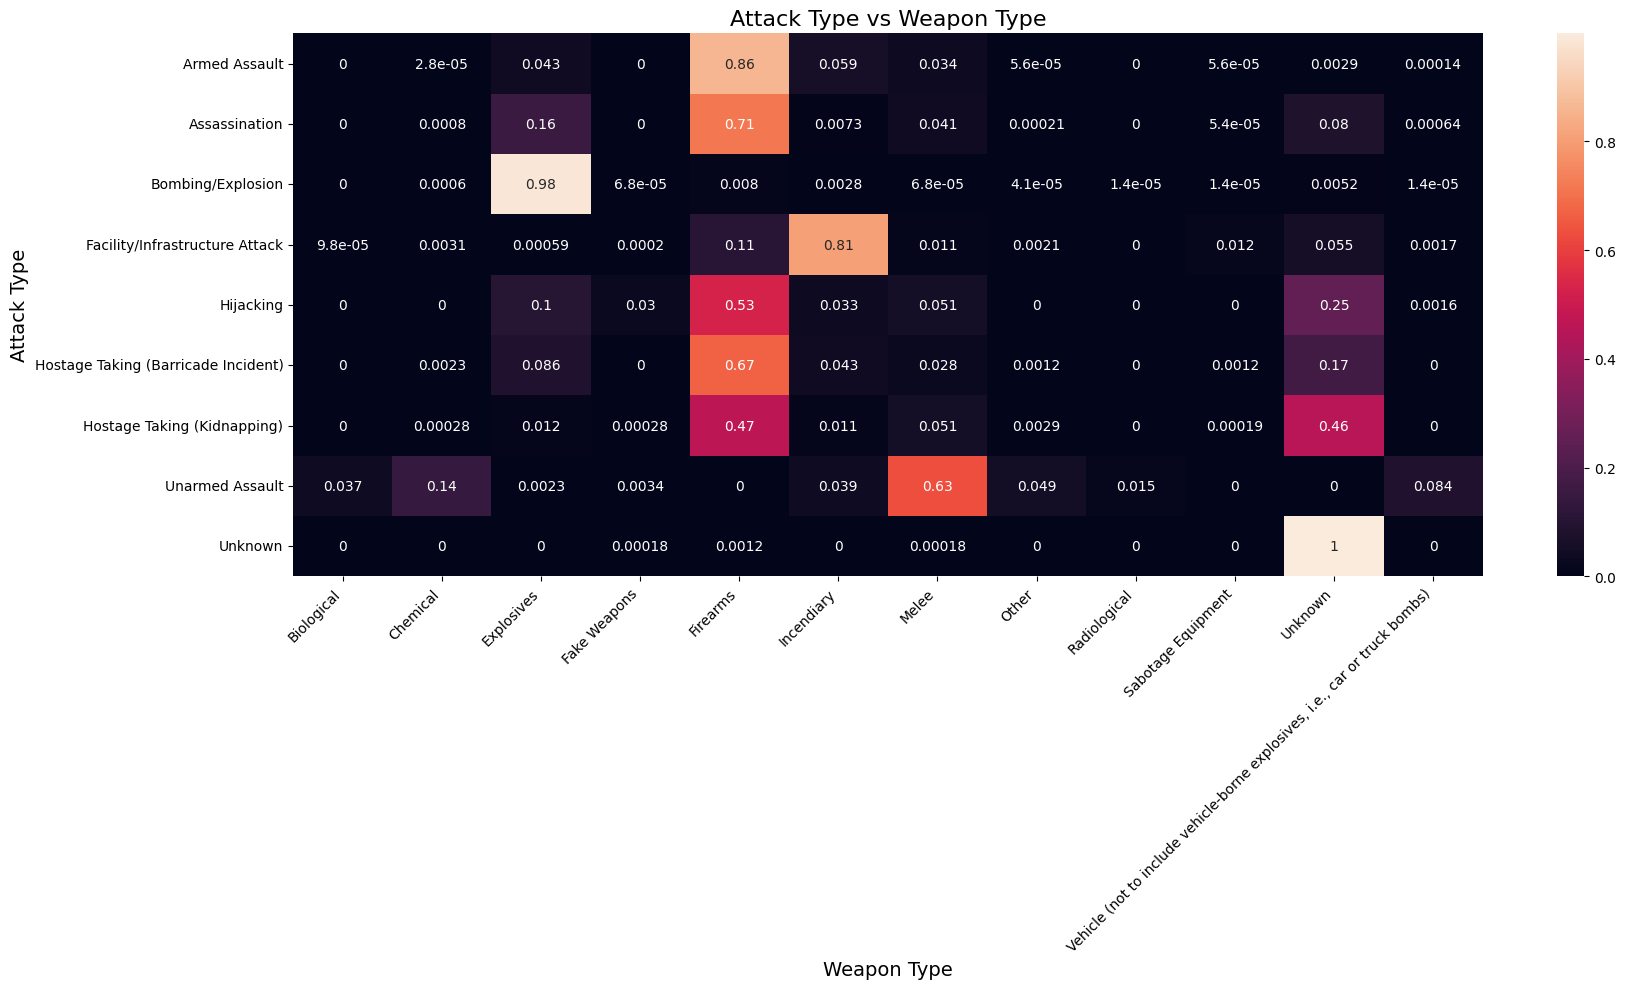

In [39]:
# attackType vs weaponType Hue = nationality
heatmap_data = pd.crosstab(
    index=data['attackType'],
    columns=[data['weaponType']],
    normalize='index'
)

plt.figure(figsize=(18, 10))
sns.heatmap(heatmap_data, annot=True)
plt.title('Attack Type vs Weapon Type', fontsize=16)
plt.xlabel('Weapon Type', fontsize=14)
plt.ylabel('Attack Type', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()